In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.append('/Users/sihonghe/Documents/2018_Fall/273AML/')
import mltools as ml

iris = np.genfromtxt("iris.txt",delimiter = None)
X, Y = iris[:,0:2], iris[:,-1]
X, Y = ml.shuffleData(X,Y)
X,_ = ml.rescale(X)
XA, YA = X[Y<2,:], Y[Y<2]
XB, YB = X[Y>0,:], Y[Y>0]

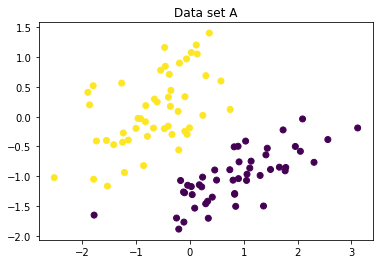

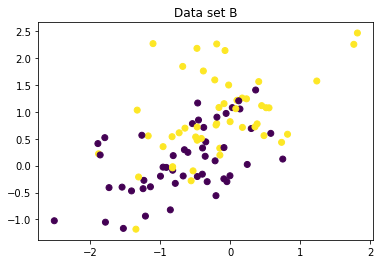

In [2]:
#####
#1.1#
#####
plt.scatter(XA[:,0],XA[:,1], c = YA)
plt.title("Data set A")
plt.show()
plt.title("Data set B")
plt.scatter(XB[:,0],XB[:,1], c =YB)
plt.show()
# Data set A is linear separable, data set B is not.

Data set A is linear separable, data set B is not.

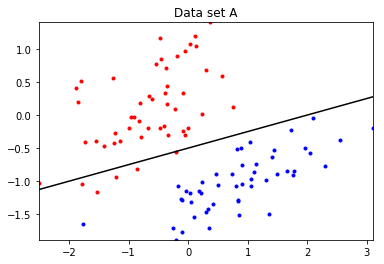

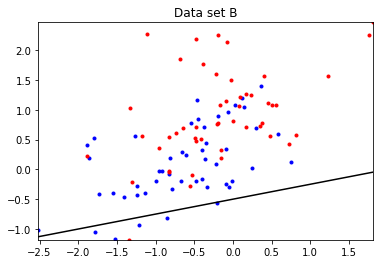

In [3]:
#####
#1.2#
#####
from logisticClassify2 import *

def plotBoundary(self,X,Y):
        """ Plot the (linear) decision boundary of the classifier, along with data """
        if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
        ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
        ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
        x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
        x2b = (self.theta[0] + self.theta[1]*x1b)/(-self.theta[2]);      # TODO find x2 values as a function of x1's values
        ## Now plot the data and the resulting boundary:
        A = Y==self.classes[0]; # and plot it:
        plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();
        
theta0 = 0.5
theta1 = -0.25
theta2 = 1
learnerA = logisticClassify2(); # create "blank" learner
learnerA.classes = np.unique(YA) # define class labels using YA or YB
learnerB = logisticClassify2(); # create "blank" learner
learnerB.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([theta0,theta1,theta2]); # TODO: fill in values
learnerA.theta = wts;# set the learner's parameters
learnerB.theta = wts;# set the learner's parameters
learnerA.plotBoundary(XA,YA)
plt.title("Data set A")
plt.show()
learnerB.plotBoundary(XB,YB)
plt.title("Data set B")
plt.show()

In [4]:
#####
#1.3#
#####
def predict(self, X):
        """ Return the predictied class of each data point in X"""
        Yhat = np.zeros((1,X.shape[0]))[0];
        ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
        ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
        ##       else predict class 0:  Yhat[i] = self.classes[0]
        for i in range(X.shape[0]):
            z = self.theta[0] + self.theta[1]*X[i,0] + self.theta[2]*X[i,1]
            if z > 0:
                Yhat[i] = self.classes[1]
            else:
                Yhat[i] = self.classes[0]
        return Yhat
    
YhatA = learnerA.predict(XA)
YhatB = learnerB.predict(XB)
errA = learnerA.err(XA,YA)
errB = learnerB.err(XB,YB)
print ("Error rate for Data set A:",errA)
print ("Error rate for Data set B:",errB)

Error rate for Data set A: 0.050505050505050504
Error rate for Data set B: 0.46464646464646464


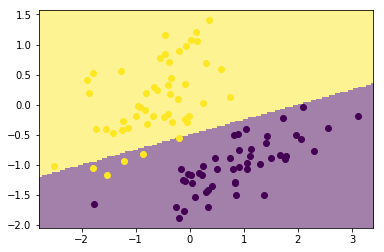

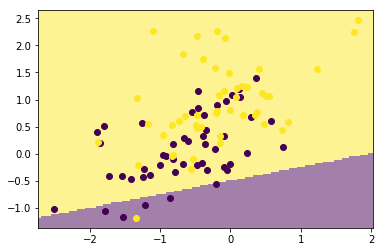

In [5]:
#####
#1.4#
#####
ml.plotClassify2D(learnerA,XA,YA);
plt.show()
ml.plotClassify2D(learnerB,XB,YB);
plt.show()
# The decision boundary matches the one I computed analytically.

The first plot is for Data set A, the second plot is for Data set B ,The decision boundary matches the one I computed analytically.

In [6]:
#####
#1.5#
#####
# See the last page of my report

In [7]:
#####
#1.6#
#####
def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];

        while not done:
            Jsur = 0
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri    = self.theta.dot(XX[i]);     # TODO: compute linear response r(x)
                si    = self.sig(ri)
                gradi = -YY[i]*XX[i] + si*XX[i];   # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step
                if YY[i] == 1:
                    Jsur += -np.log(si)
                else:
                    Jsur += -np.log(1-si)

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jnll.append( Jsur/M ) # TODO evaluate the current NLL loss
            # plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            # if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            # plt.pause(.01);                    # let OS draw the plot

            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            if epoch > stopEpochs or (epoch > 1 and abs(Jnll[-1] - Jnll[-2]) < stopTol):
                done = True;# or if Jnll not changing between epochs ( < stopTol )
        plt.figure(1); plt.plot(Jnll,'b-',J01,'r-');plt.draw(); 
        plt.figure(2); self.plotBoundary(X,Y);plt.draw(); 


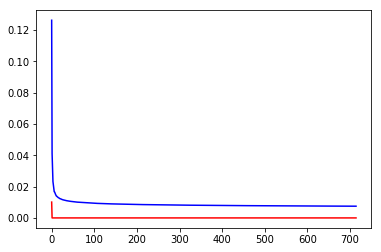

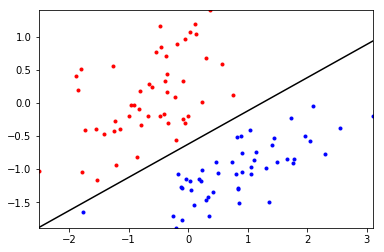

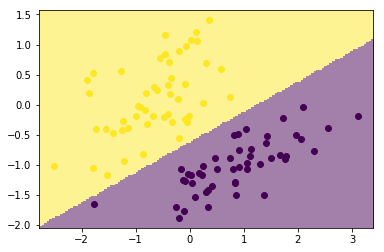

Error rate for A: 0.0
theta: [ 6.93169635 -5.60281615 11.14374859]


In [8]:
#######
#1.7.1#
#######

learnerA2 = logisticClassify2(XA,YA,initStep=2.0, stopTol=1e-6, stopEpochs=5000, plot=None, id = 1)
plt.show()
ml.plotClassify2D(learnerA2,XA,YA); 
print ("Error rate for A:", learnerA2.err(XA,YA)) 
print ("theta:", learnerA2.theta)

1.7.1

My parameter choice are:

initStep=2.0, stopTol=1e-6, stopEpochs=5000 for Data set A.

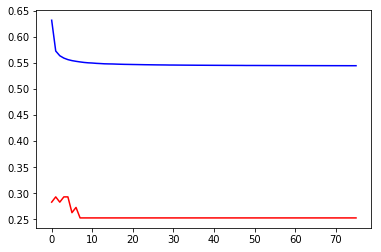

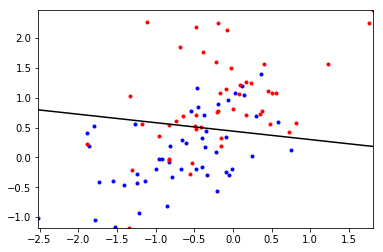

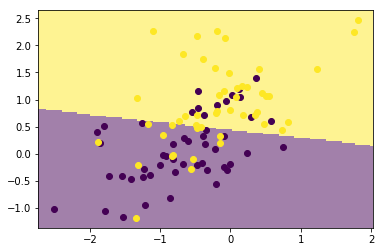

Error rate for B: 0.25252525252525254
theta: [-0.68290998  0.22003038  1.55360907]


In [9]:
#######
#1.7.2#
#######
learnerB2 = logisticClassify2(XB,YB,initStep=0.1, stopTol=1e-6, stopEpochs=5000, plot=None,id = 1)
plt.show()
ml.plotClassify2D(learnerB2,XB,YB); 
print ("Error rate for B:", learnerB2.err(XB,YB)) 
print ("theta:", learnerB2.theta)

1.7.2

My parameter choice are:

initStep=0.1, stopTol=1e-6, stopEpochs=5000 for Data set B.

In [10]:
#####
#1.8#
#####
def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];alpha=1;

        while not done:
            Jsur = 0
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri    = self.theta.dot(XX[i]);     # TODO: compute linear response r(x)
                si    = self.sig(ri)
                gradi = -YY[i]*XX[i] + si*XX[i] + 2*alpha*self.theta;     # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step
                temp = alpha*self.theta.dot(self.theta)
                if YY[i] == 1:
                    Jsur += -np.log(si) + temp
                else:
                    Jsur += -np.log(1-si) + temp

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jnll.append( Jsur/M ) # TODO evaluate the current NLL loss
            # plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            # if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            # plt.pause(.01);                    # let OS draw the plot

            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            if epoch > stopEpochs or (epoch > 1 and abs(Jnll[-1] - Jnll[-2]) < stopTol):
                done = True;# or if Jnll not changing between epochs ( < stopTol )
        plt.figure(1); plt.plot(Jnll,'b-',J01,'r-');plt.draw(); 
        plt.figure(2); self.plotBoundary(X,Y);plt.draw(); 

1.8

I choose $\alpha$ to be 1. 

My parameter choice are:

initStep=0.01, stopTol=1e-4, stopEpochs=5000 for Data set A.

initStep=0.02, stopTol=1e-4, stopEpochs=5000 for Data set B.

The error, estimeted theta are very different basing on my choices.

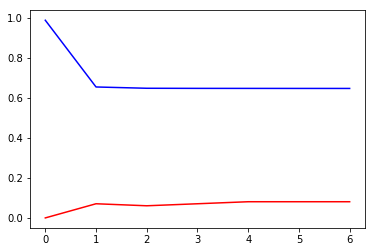

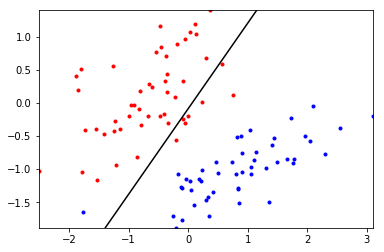

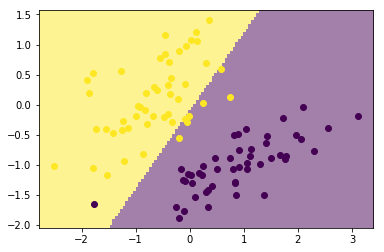

Error rate for A: 0.08080808080808081
theta: [ 0.01069409 -0.16007794  0.12374011]


In [11]:
#######
#1.8.1#
#######

learnerA2 = logisticClassify2(XA,YA,0.01,id = 2)
plt.show()
ml.plotClassify2D(learnerA2,XA,YA); 
print ("Error rate for A:", learnerA2.err(XA,YA)) 
print ("theta:", learnerA2.theta)

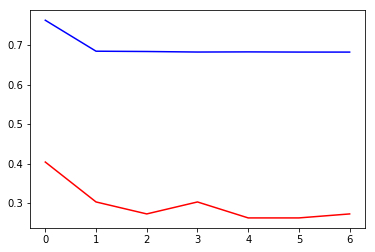

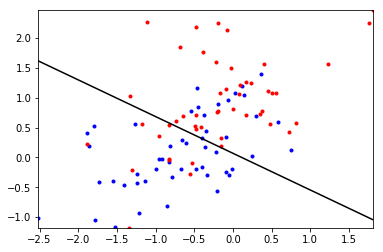

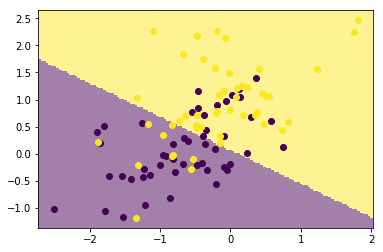

Error rate for B: 0.2727272727272727
theta: [-0.00607584  0.05435387  0.08839838]


In [12]:
#######
#1.8.2#
#######

learnerB2 = logisticClassify2(XB,YB,0.02,id = 2 ); 
plt.show()
ml.plotClassify2D(learnerB2,XB,YB); 
print ("Error rate for B:", learnerB2.err(XB,YB)) 
print ("theta:", learnerB2.theta)

In [13]:
###
#2#
###
# See the last page of my report

In [14]:
############################
#Statement of Collaboration#
############################
# I discussed 1.7 with Yuchen Qiu.